In [ ]:
import pandas as pd

#loading the dataset
df = pd.read_csv('Employeeattrition.csv')

missing_values = df.isnull().sum() #check for missing values

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


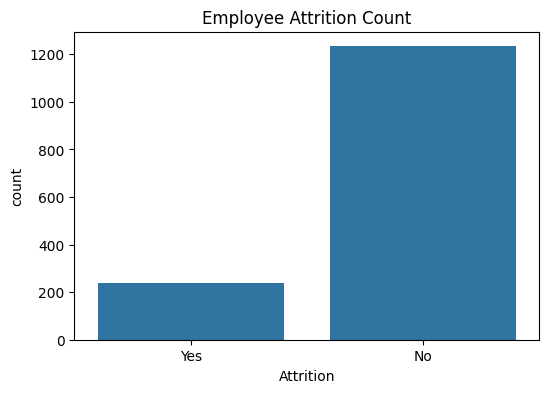

In [ ]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (6,4))
sns.countplot(data=df, x = "Attrition")
plt.title("Employee Attrition Count")
plt.show()

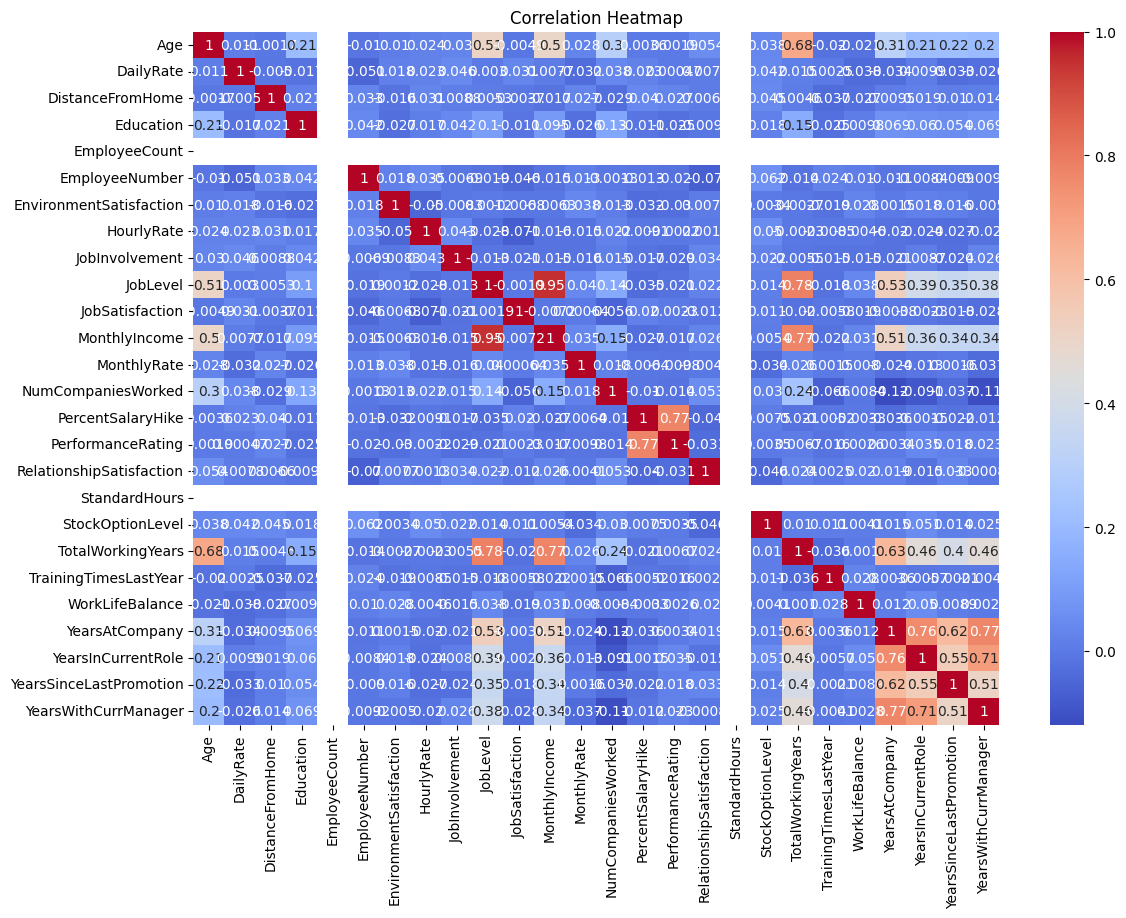

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(13,9))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap ='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

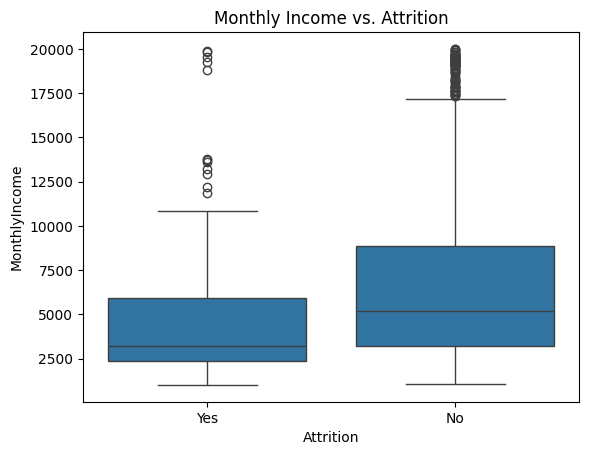

In [ ]:
#Box plot of MonthlyIncome by Attrition Status
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title("Monthly Income vs. Attrition")
plt.show()

In [ ]:
#Feature Engineering and Selection

df_encoded = pd.get_dummies(df, drop_first = True) # Encode categorical features using one-hot encoding

target = df_encoded['Attrition_Yes']
features = df_encoded.drop(columns=['Attrition_Yes']) # seperate target variables and features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features = pd.DataFrame(features_scaled, columns=features.columns)



In [ ]:
#Train-Test-Split and Cross-Validation

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state= 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Model Comparison

In [ ]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
log_model.fit(X_train_scaled, y_train)
log_y_pred = log_model.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test, log_y_pred)

print("Logistic regression Cross-Validation Scores:", log_cv_scores)
print("Logistic regression Mean CV Accuracy:", log_cv_scores.mean())
print("Logistic regression Test Accuracy:", log_accuracy)


Logistic regression Cross-Validation Scores: [0.84745763 0.89361702 0.86382979 0.86808511 0.84680851]
Logistic regression Mean CV Accuracy: 0.8639596105301118
Logistic regression Test Accuracy: 0.8843537414965986


In [ ]:
#Support Vector Machine

from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear')
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring="accuracy")
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print("SVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Mean CV Accuracy:", svm_cv_scores.mean())
print("SVM Test Accuracy:", svm_accuracy)

SVM Cross-Validation Scores: [0.84322034 0.89361702 0.85106383 0.88085106 0.84680851]
SVM Mean CV Accuracy: 0.8631121529029931
SVM Test Accuracy: 0.8843537414965986


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring="accuracy")
dt_model.fit(X_train_scaled, y_train)
dt_y_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Mean CV Accuracy:", dt_cv_scores.mean())
print("Decision Tree Test Accuracy:", dt_accuracy)


Decision Tree Cross-Validation Scores: [0.77966102 0.81276596 0.76595745 0.81276596 0.76595745]
Decision Tree Mean CV Accuracy: 0.787421565091958
Decision Tree Test Accuracy: 0.7755102040816326


In [ ]:
#Hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'rbf', 'poly'],'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_svm_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
best_svm_accuracy = grid_search.best_score_

print("Best SVM Parameters:", best_svm_params)
print("Best SVM CV Accuracy:", best_svm_accuracy)


Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM CV Accuracy: 0.8741615578795529


In [ ]:
#Evaluate Model

best_model_prediction = best_svm_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, best_model_prediction)
print("Final Test Accuracy of Best Model:", final_accuracy)

Final Test Accuracy of Best Model: 0.8979591836734694


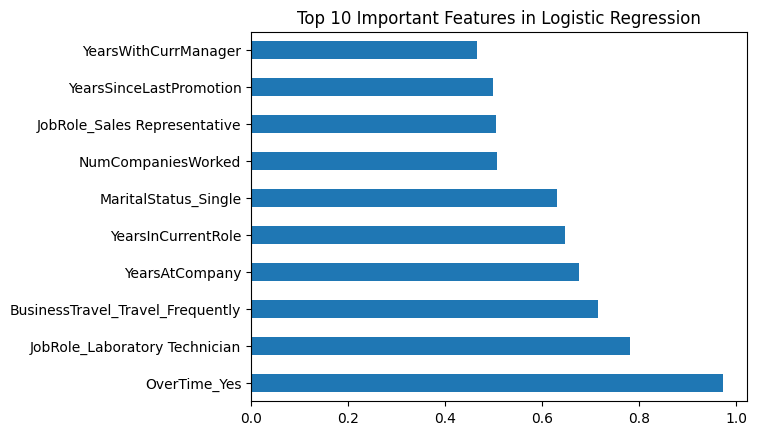

In [ ]:
# Feature importance with Logistic Regression coefficients
feature_importance = pd.Series(log_model.coef_[0], index=features.columns)
important_features = feature_importance.abs().sort_values(ascending=False).head(10)

important_features.plot(kind="barh")
plt.title("Top 10 Important Features in Logistic Regression")
plt.show()


In [ ]:
#ROC and AUC

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

log_model = LogisticRegression()
svm_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()

log_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Compute ROC curve and AUC score for each model
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
log_auc = roc_auc_score(y_test, log_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

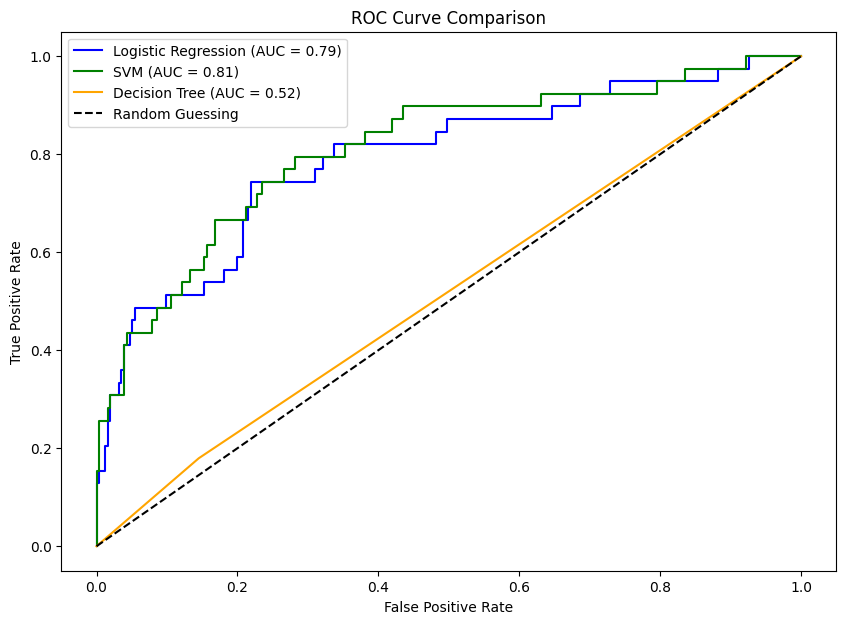

In [ ]:
plt.figure(figsize=(10, 7))

# Plot ROC curve
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', color='blue')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='green')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})', color='orange')

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Best parameters from GridSearchCV
best_params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

# Create an SVM model with the best parameters
best_svm_model = SVC(**best_params)

# Fit model to training data
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = best_svm_model.predict(X_test_scaled)

# Evaluate predictions
test_accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 0.8979591836734694
Confusion Matrix:
 [[248   7]
 [ 23  16]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94       255
        True       0.70      0.41      0.52        39

    accuracy                           0.90       294
   macro avg       0.81      0.69      0.73       294
weighted avg       0.89      0.90      0.89       294

